## DSC550 Term Project 
#### Submitted By - Vivek Giri
### Submitted On - 06/01/2025

### Prediction of Obesity risk based on eating habits and physical activity  

#### Introduction  

Obesity is a medical condition that is related to the excessive accumulation of body fat. It is not only a cosmetic concern but rather a medical problem that increases the risk of other health problems and diseases like heart diseases, diabetes, high cholesterol, high blood pressure, liver disease, musculoskeletal disorders, and certain cancers. Since 1997, WHO has considered obesity a global epidemic and a significant health problem. To prevent obesity, various organizations, including government and non-government, are promoting campaigns regarding two main risk factors: eating habits and physical activity (Gozukara et al., 2023).

Although it is known that excessive intake of calories can cause obesity, nutritional factors like low-quality diet, unbalanced diet, processed foods, and alcohol consumption can also increase the risk of obesity. Physical activity has also been very influential in controlling or preventing obesity.  The frequency, duration, and intensity of physical activity and exercises play an essential role in the effective prevention and reduction of obesity (Gozukara et al., 2023). Eating healthy and nutrituous food helps in managing proper body weight and preventing obesity. Therefore, it becomes important to invest resources in investigating the relationship of obesity with eating habits and physical activity. 

Healthcare plans can perform data mining and build a model to predict the early detection of obesity risk for their members, which can yield enormous benefits for both health plans and their members. Early detection of obesity risk helps individuals to be aware of the risk and take preventive measures so that they do not develop obesity related health conditions and diseases in the later stages of their life. It also helps health plans to intervene and incentivize members to motivate them in practicing obesity management such as healthy eating habits, exercises, and increased physical activity. This reduces the number of related health claims caused by obesity related diseases and essentially allows health plans to reduce the cost of care, enhance competitiveness and generate more revenue.

This study generated and evaluate models to _predict obesity risk based on eating habits and physical activity_

#### Dataset  


_[UC Irvine Machine Learning Repository - Obesity levels, Eating Having and Physical activity dataset.][1]_

This dataset include data about eating habits, physical activity, weight, height and obesity levels of individuals from the countries of mexico, Peru and Columbia. The data includes the eating habits and physical activity levels of 498 participants aged between 14 and 61 years (UCI. 2019).

The originally collected data was preprocessed, such as the removal of missing values, and normalization was performed. It was also balanced to reduce the skewness of the obesity levels. 23% of the source data is actual responses collected over a 30-day survey, while the remaining 77% was synthetically generated using SMOTE (Palechor & de la Hoz Manotas, 2019).

There are 17 variables in the dataset.

 - Gender - male or female
 - Age - age in years
 - Height - height in meters
 - Weight - weight in kgs
 - Family History of overweight - yes or no
 - Frequently consume high caloric food (FAVC) - yes or no
 - Consumption of vegetables in meals (FCVC) - yes or no
 - Number of main meals (NCP) - 1 = between 1 and 2, 2 = three, 3 = more than three, 4 = no answer
 - Consumption of food between meals (CAEC) - no, sometimes, frequently, or always
 - Whether the individual smokes or not (SMOKE) - yes or no
 - Daily consumption of water (CH20) - 1 = less than a liter, 2 = between 1 and 2 L, 3 = more than 2 L
 - Consumption of alcohol (CALC) - no, sometimes, frequently or always
 - Calorie consumption monitoring done (SCC) - yes or no
 - Frequency of Physical activity (FAF) - 1 = never, 2 = once or twice a week, 3 = two or three times a week, 4 = four or five times a week
 - Use of electronic devices (TUE) - 0 = none, 1 = less than an hour, 2 = between one and three hours, 3 = more than three hours
 - Mode of transportation used (MTRANS) - automobile, motorbike, bike, public transportation, walking
 - Obesity Level - the obesity level of the individual

Obesity level is labelled in the source data with classes as given below. 

 - Insufficient Weight 
 - Normal Weight
 - Overweight I
 - Overweight II
 - Obesity I
 - Obesity II
 - Obesity III

[1]: https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition

#### Exploratory Data Analysis  


_Exploratory Data Analysis_ was performed on the dataset to analyze and investigate the dataset with the aim of identifying relationship or association between the obesity and eating habits and physical activity.

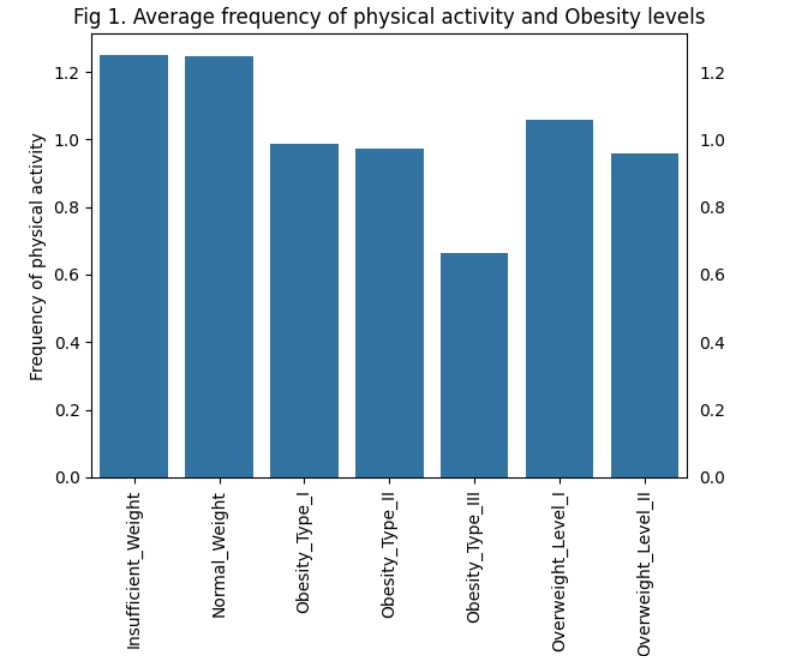

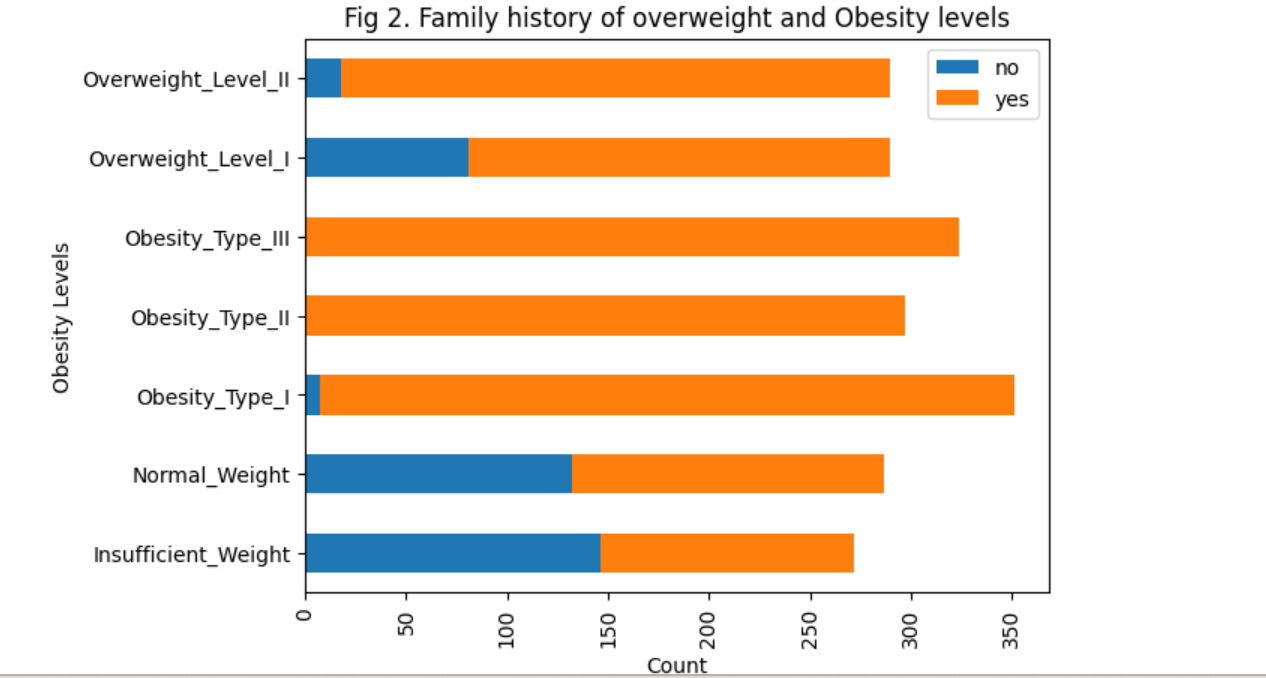

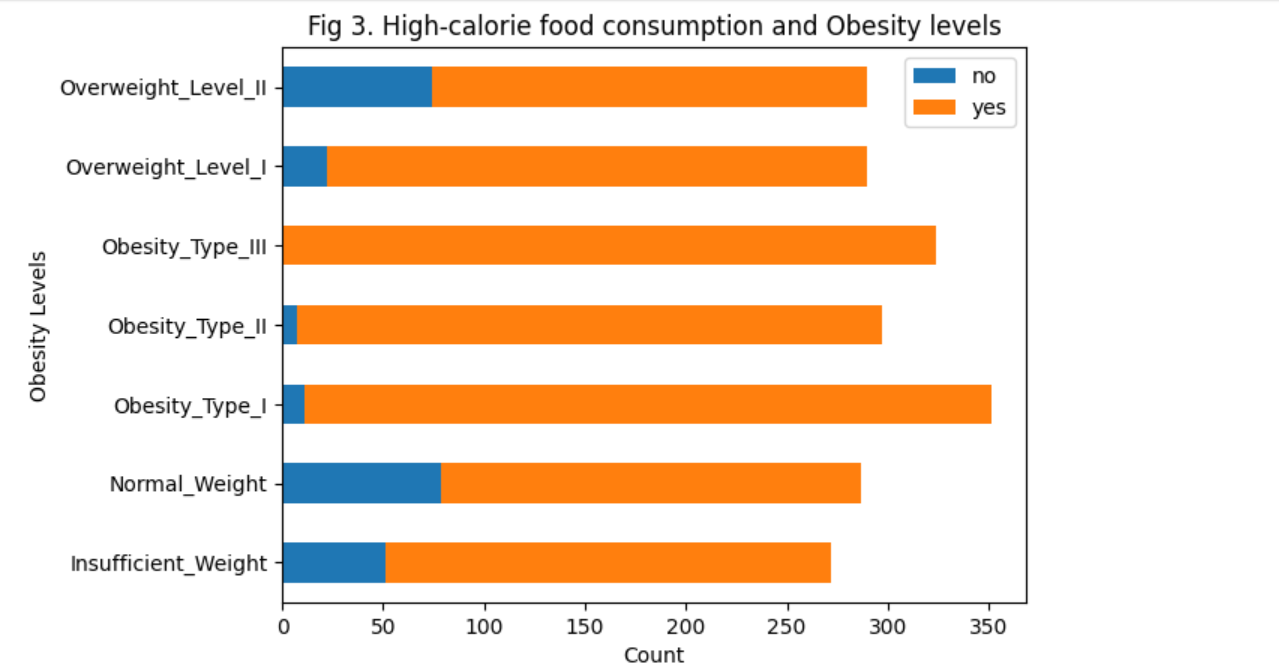

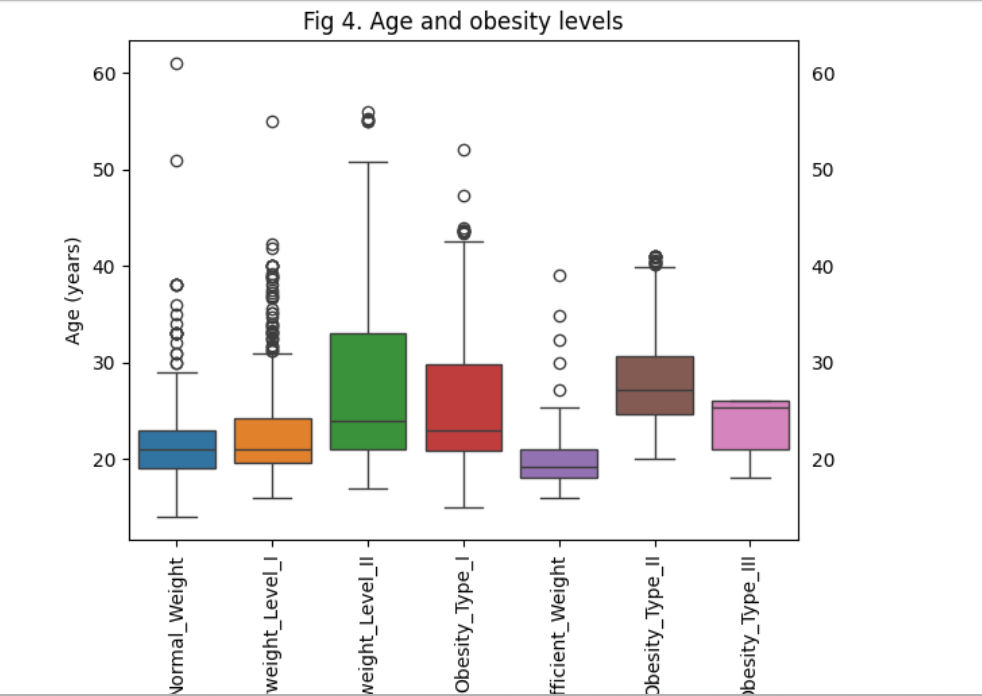

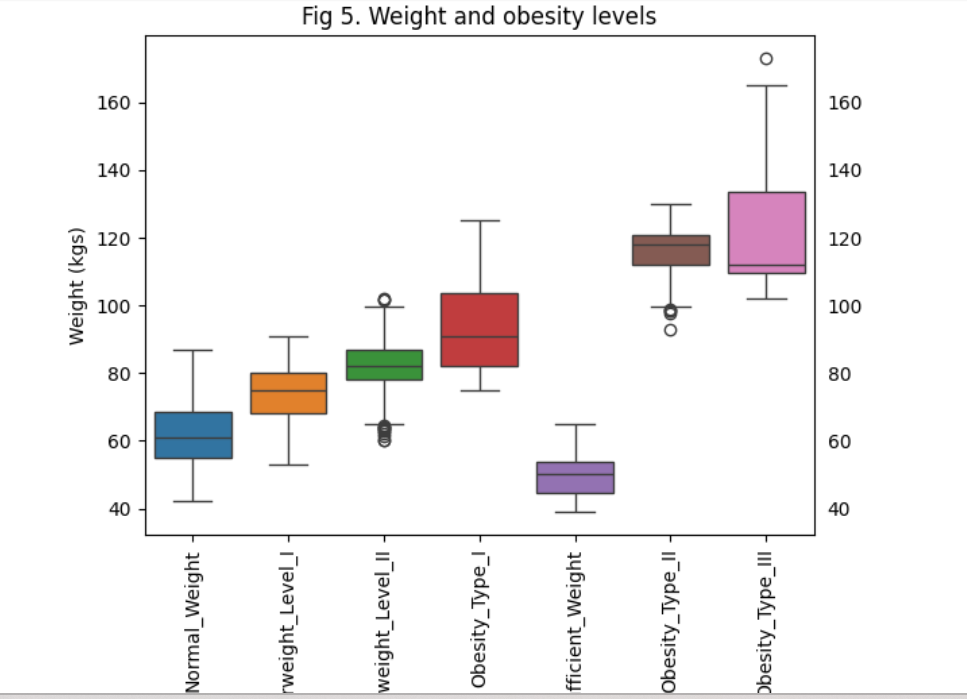


From the above plots, we observe that there is a relationship between eating habits, physical activity and obesity. We noticed that the majority of the obese people frequently consume high-calorifie foods and perform lower physical activity. Family history may also play a vital role in increasing the risk of obesity because we see that most obese and overweight people have a family history of overweight. We also observed that obese and overweight people are generally older, and therefore, obesity risk may also increase with age. Therefore, eating habits, physical activity, family history, age and body weight appear to be significant factors in predicting obesity levels for an individual.

#### Data Preparation  


Fig 6 shows that there was no significant imbalance among the target classes hence no action was needed to balance the target classes.

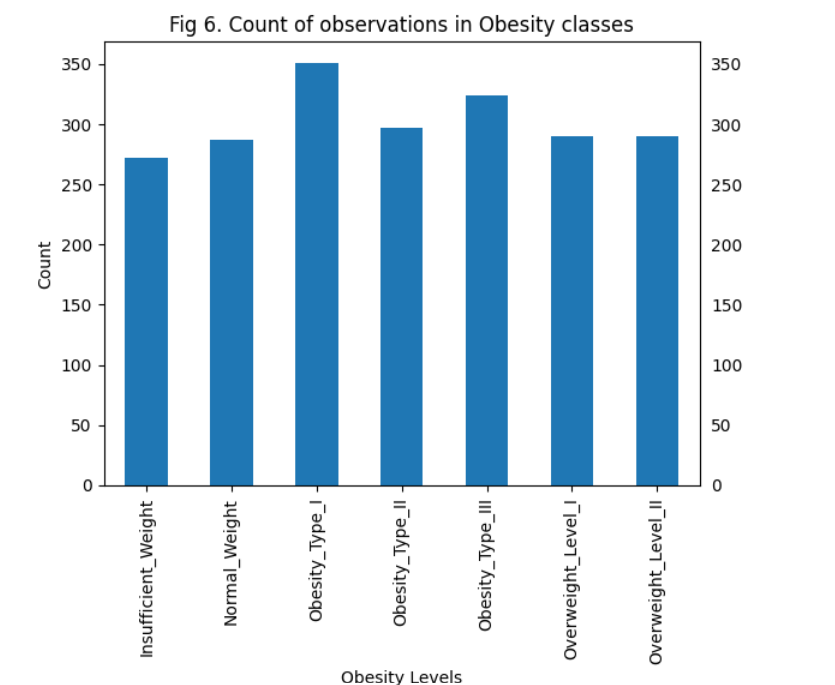

The source dataset was transfomed in order to use it im modeling. Various steps such as _transformation_, _feature selection_ and _scaling_ was performed to make the data ready for modeling.

Categorical features that have some natural odering are better to be converted to ordinal values for modeling. Therefore below variables having natural order were transfomed to numerical variables by assigning values in ascending order staring with 0 for the lowest category.

- Categories in `consumption of food between meals` have some natural order. Based on the nature of this study, _no consumption of food between meals_ has a lower order than _frequent consumption of food between meals_, because _frequent consumption of food between meals_ can cause intake of more calories than our body needs and increase the obesity risk.
- Categories in `consumption of alcohol` have some natural order. Based on the nature of this study, _no consumption of alcohol_ has a lower order than _frequent or always consumption of alcohol_, because _consumption of alcohol_ has been medically associated with _obesity_ related problems.
- Categories in `mode of transportation` have some natural order. Based on the nature of this study, _using automobile for transportation_ has a lower order than _walking or biking_. This is because _walking or biking_ will burn more calories and we know that burning more calories helps in preventing or managing _obesity_.

We converted nominal categorical variables which do not have any natural ordering to numerical values using one-hot encoding or dummying. This approach genereates a binary feature for every ctaegory present in a feature.  As part of the dummying, we dropped the first value of dummy variable to avoid multicollinearity.

Feature selection techniques were used to select top $90$% of the most informative features for modeling. As this study involves categorical target, we used _chi-square_ statistic to select the categorical features and ANOVA _f-value_ statistic to select the numerical features. _Chi-sqaure statistic_ can be used to determine association or dependence between categorical variables. If there is no significant association or dependence with target then such features will not be informative or important in predicting the target. ANOVA F-test can be used to determine if there is significant difference in variances of the numerical varaible between the groups of the target classes. If there is no significant difference, then such features will not be informative and important in predicting the target.
The dataset was splitted to the training and test set before applying the feature selection method inorder to prevent data leakage. We  noticed that the chi selector selected 7 features out of 8 categorical features, and F-value selector selected 7 numerical features out of  8 numerical features. Given below the list of selected features.

- Consumption of food between meals
- Consumption of alcohol 
- Mode of transportation used
- Gender
- Family History of overweight 
- Whether individual smokes or not
- Calorie consumption monitoring done
- Age
- Weight
- Height
- Consumption of vegetables in meals
- Number of main meals
- Daily consumption of water
- Frequency of Physical activity

Scaling was performed to transform the features in the same scale. Various models like Logistic Regression, KNN we are using in the study are effected by the scale of the features. We ahve used _MinMax_ scaler for scaling the features. MinMax scaler uses the minimum and maximum values of a feature to rescale the values within range.

#### Model Building and Evaluation  


The target variable in this study has multiple categories, therefore it is a _multiple classification_ problem. We have used below models and then executed _model evaluation_ to check the performance of each model. 
- Logistic Regression
- KNN
- Decision Trees
- Random Forest

We used GridSearch model selection technique to identify the best hyperparameters for each of the models. The _model evaluation_ was performed along with _model hyperparameter selection_ using _Nested Cross-Validation_. Nested cross-validation allows us to perform both model selection and model evaluation at the same time. 

Nested cross-validation wraps cross-validation for the hyperparameter search (selection) within another cross-validation for model evaluation. Therefore, the _inner_ cross validation searches for the best model hyperparameters, while the _outer_ cross-validation evaluates the performance of the model selected from the _inner_ cross validation.

We used **accuracy**, **precision**, **recall**, **F1-score** to evaluate model performance. Our data does not suffer from significant _class imbalance_ in the target variable, so we could have only used _accuracy_ metric. However, accuracy does not capture the model's predictive power to predict the target classes correctly. Hence, we also evaluated _precision_, _recall_, and _F1-score_. Based on the nature of the problem, it is important to correctly identify the target class in an optimistic manner, but also, at the same time have good correctness in the target class, so that the obesity management efforts and resources are directed to the right people. _Precision_ is the proportion of every observation that is predicted positive is actually positive. Models with high precision are pessimistic because they predict a class only when it is very certain. On the other hand, models with high recall are optimistic and try to predict as many true positives as possible out of all the actual positive observations. Furthermore, we cheked the _F1-score_, which is a good measure of the balance between precision and recall. 

Additionally, we used **Confusion Matrix** to evaluate the overall performance of the selected model. A confusion matrix is a table that displays a grid of the number of observations in the actual class against the predicted class. It shows number of the correct and incorrect predictions.

We created a `DummyClassifer` to create a baseline model against which we compare the scores of trained model. It helped us to ascertain that the trained model is better than random guessing.

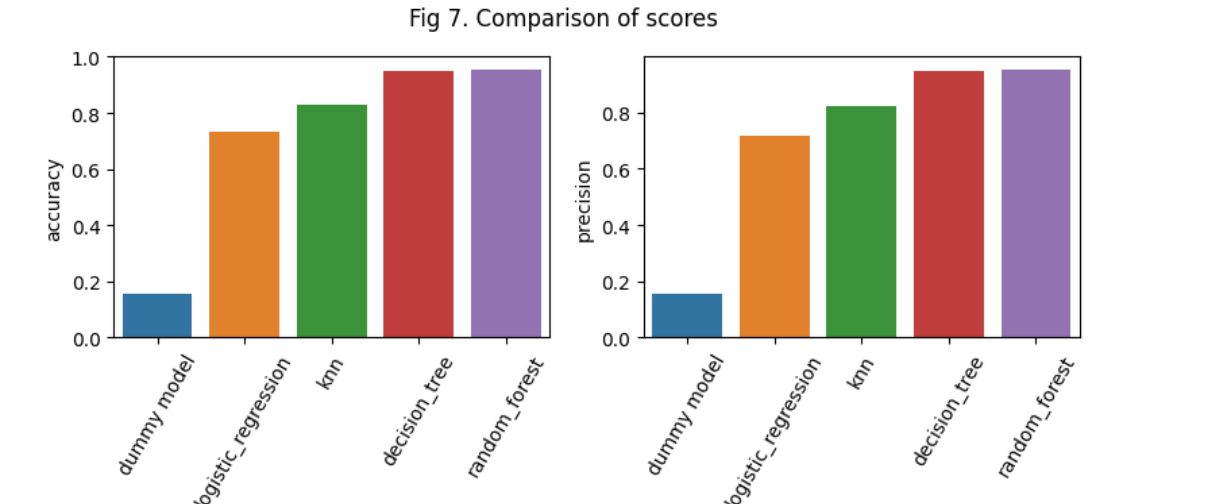

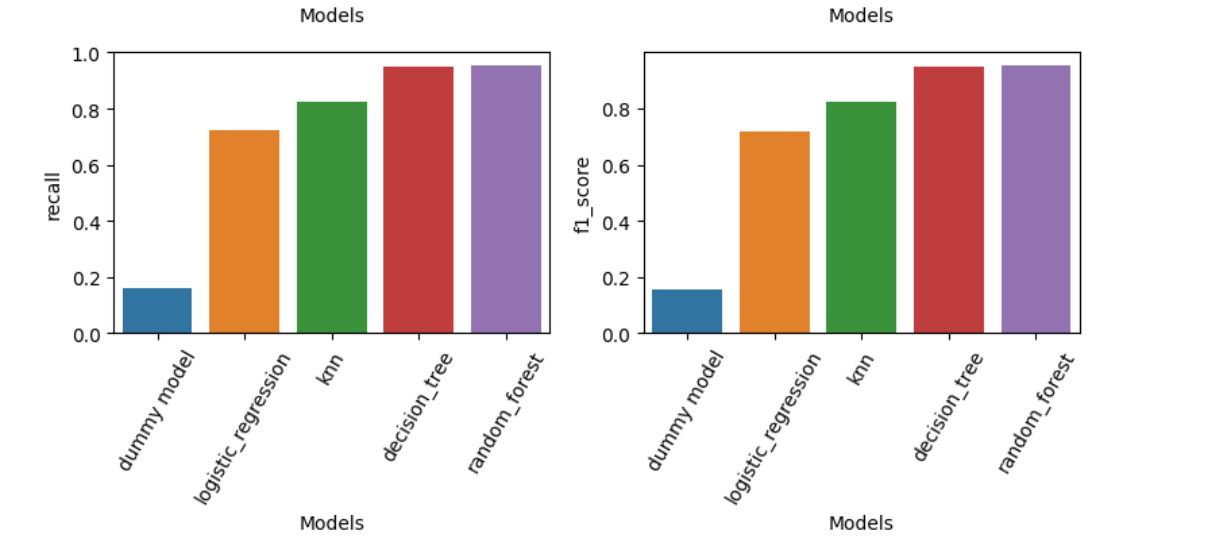

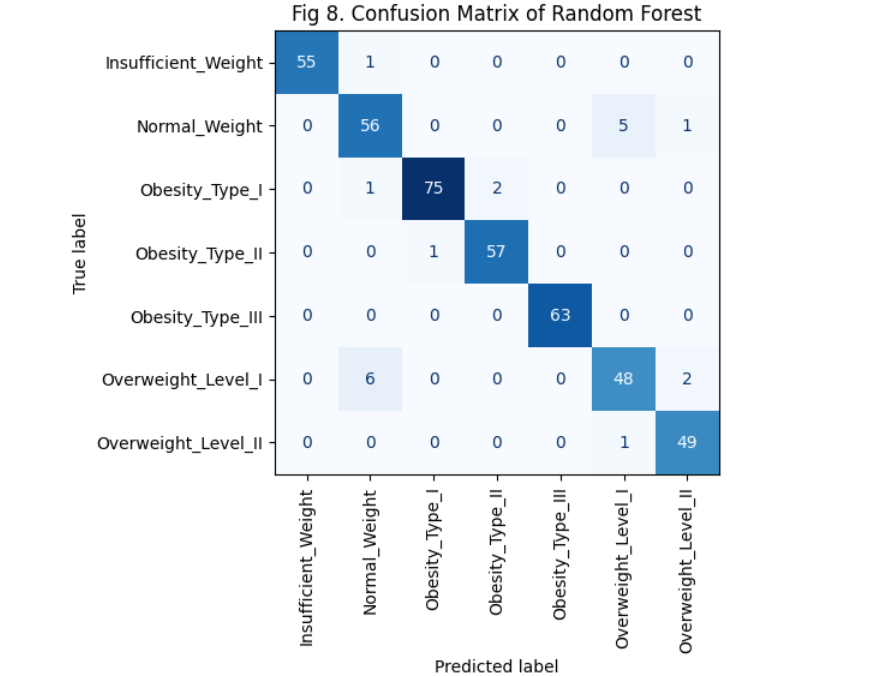

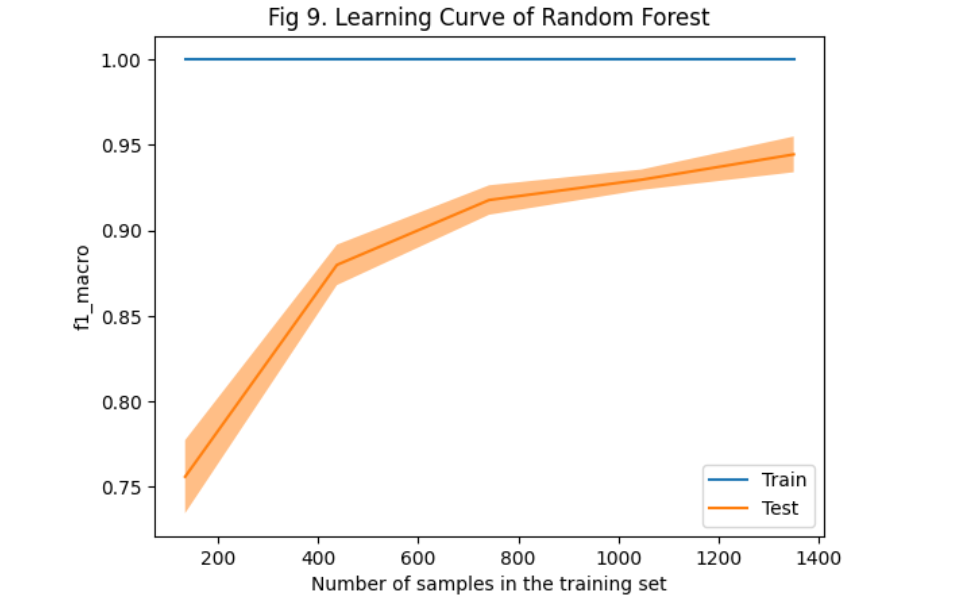

Given below the performance scores of all the models.

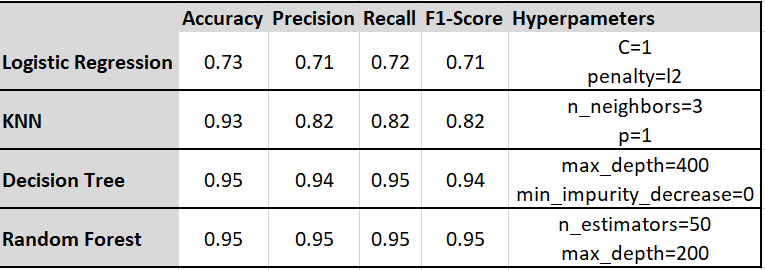

#### Conclusion  


We evaluated the performance of four different models, Logistic Regression, K Nearest Neighbor (KNN), Decision Trees and Random Forest. From Fig 6, we observe that all of the trained models perform better than just random selection. Fig 6 also shows that _Random Forest_ is the _best-performing_ model across all the metrics. However, the _Decision Tree_ model's performance is also very close to that of the Random Forest model. Confusion matrix (Fig 8) for the Random Forest shows that overall, the model performs very well with a few incorrect predictions, such as Overweight_Level_I and Normal Weight. A validation curve (Fig 9 ) was used to check if addding more data in training would further help to increase the performance of the Random Forest model. It shows that as the number of test instances increases the test score also increases, and then starts to plateau at the end, which means that adding more data observations will not provide a huge benefit.

The scores of the best performing _Random Forest_ model is good enough to accept the model for production deployment. The model is able to predict _obesity_ based on eating habits and physical activity with $95$% accuracy, precision and recall.

There is scope to use some other models like XGBoost and Deep Learning and compare the performance with Random Forest model to check if such models would have better performance in predicting the target.

#### References  


Estimation of obesity levels based on eating habits and physical condition. (2019). UCI Machine Learning Repository. https://doi.org/10.24432/C5H31Z.

Gozukara Bag, H.G., Yagin, F.H., Gormez, Y., González, P.P., Colak, C., Gülü, M., Badicu, G., Ardigò, L.P. 2023. Estimation of Obesity Levels through the Proposed Predictive Approach Based on Physical Activity and Nutritional Habits. Diagnostics. 13(18), 2949. https://doi.org/10.3390/diagnostics13182949

Palechor, F.M., de la Hoz Manotas, A. (2019). Dataset for estimation of obesity levels based on eating habits and physical condition in individuals from Colombia, Peru and Mexico. Data Brief. 25, 104344. https://doi.org/10.1016/j.dib.2019.104344